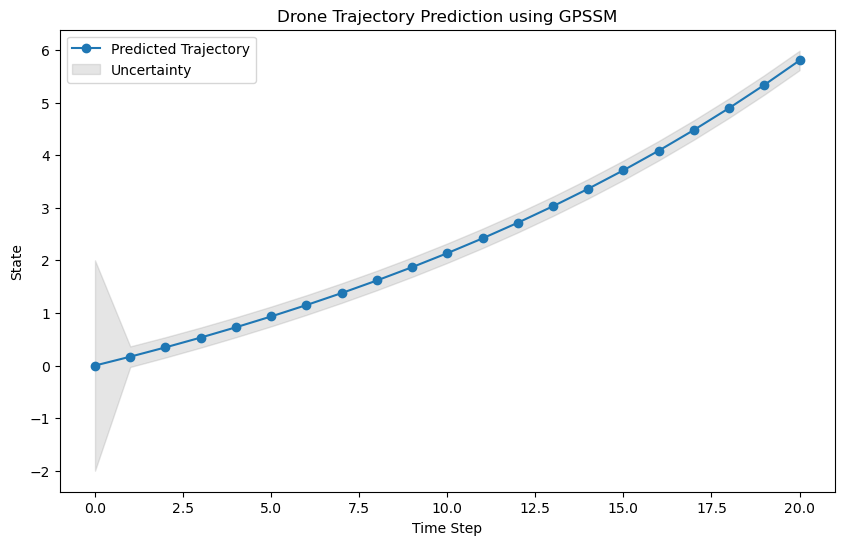

In [1]:
import numpy as np
import GPy
import matplotlib.pyplot as plt

# 1. Generate Simulated Data (for training the GPSSM)
def drone_dynamics(state, control_input):
    """ A simple 1D drone dynamic model: x_{t+1} = x_t + u_t + w_t """
    return state + control_input

# Generate training data
np.random.seed(42)
n_samples = 50
X_train = np.linspace(0, 10, n_samples).reshape(-1, 1)  # Control inputs
Y_train = drone_dynamics(X_train, np.random.normal(0, 0.1, X_train.shape))  # State transitions with noise

# 2. Train a Gaussian Process Model on the data
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(X_train, Y_train, kernel)
model.optimize()

# 3. Predict the next state using the GPSSM
def predict_next_state(current_state, control_input):
    X_test = np.array([[current_state + control_input]])
    mean, variance = model.predict(X_test)
    return mean.flatten(), variance.flatten()

# 4. Generate and Predict the Trajectory
n_steps = 20
initial_state = 0.0
control_inputs = np.linspace(0.1, 0.5, n_steps)
states = [initial_state]
variances = [1]

for u in control_inputs:
    next_state, variance = predict_next_state(states[-1], u)
    states.append(next_state[0])
    variances.append(variance[0])

# 5. Plot the Results
plt.figure(figsize=(10, 6))
plt.plot(range(n_steps + 1), states, label="Predicted Trajectory", marker='o')
plt.fill_between(range(n_steps + 1), 
                 np.array(states) - 2 * np.sqrt(variances), 
                 np.array(states) + 2 * np.sqrt(variances), 
                 color='gray', alpha=0.2, label="Uncertainty")
plt.xlabel("Time Step")
plt.ylabel("State")
plt.legend()
plt.title("Drone Trajectory Prediction using GPSSM")
plt.show()
